## Image Classification on Fashion MNIST using simple 2 layer NN

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
X_train = data.train.images
y_train = data.train.labels

X_test = data.test.images
y_test = data.test.labels

In [4]:
print (X_train.shape)
print (y_train.shape)

(55000, 784)
(55000, 10)


In [5]:
index2label = {0 : "T-shirt/top",
               1 : "Trouser",
               2 : "Pullover",
               3 : "Dress",
               4 : "Coat",
               5 : "Sandal",
               6 : "Shirt",
               7 : "Sneaker",
               8 : "Bag",
               9 : "Ankle boot",
              }

In [6]:
def display_digit(x, y, i):
    s = [i for i,x in enumerate(y_train[i]) if x == 1]
    label = index2label.get(s[0])
    image = x[i].reshape([28,28])
    plt.title('Example: %d  Label: %s' % (i, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

def display_mult_flat(start, stop, x):
    images = x[start].reshape([1,784])
    for i in range(start + 1, stop):
        images = np.concatenate((images, x[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray'))
    plt.show()

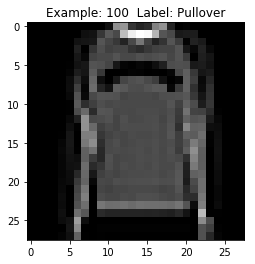

In [7]:
display_digit(X_train, y_train, 100)

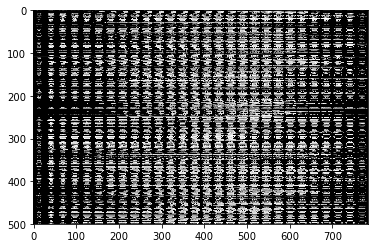

In [8]:
display_mult_flat(0, 500, X_train)

In [9]:
X = tf.placeholder(tf.float32, shape=(None, 784), name = "input")
y_ = tf.placeholder(tf.float32, shape=(None, 10), name = "output")

In [10]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [11]:
y = tf.nn.sigmoid(tf.matmul(X, W) + b)

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [13]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [14]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [15]:
train = tf.train.GradientDescentOptimizer(0.03).minimize(cost)

In [16]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [17]:
for i in range(5000):
    batch_xs, batch_ys = data.train.next_batch(512)
    _, loss, acc = sess.run([train, cost, accuracy], feed_dict={X: batch_xs, y_: batch_ys})
    
    if (i % 500 == 0):
        print("Epoch: {}, Loss: {}, Accuracy: {} ".format(i, loss, acc))


print("Test Accuracy:{}".format(sess.run([accuracy], feed_dict={X: data.test.images,
                                      y_: data.test.labels})))

Epoch: 0, Loss: 2.3025827407836914, Accuracy: 0.095703125 
Epoch: 500, Loss: 1.852843999862671, Accuracy: 0.681640625 
Epoch: 1000, Loss: 1.7640125751495361, Accuracy: 0.734375 
Epoch: 1500, Loss: 1.7570477724075317, Accuracy: 0.6875 
Epoch: 2000, Loss: 1.742887020111084, Accuracy: 0.72265625 
Epoch: 2500, Loss: 1.7255699634552002, Accuracy: 0.701171875 
Epoch: 3000, Loss: 1.7229138612747192, Accuracy: 0.736328125 
Epoch: 3500, Loss: 1.6981760263442993, Accuracy: 0.71875 
Epoch: 4000, Loss: 1.7073308229446411, Accuracy: 0.720703125 
Epoch: 4500, Loss: 1.6885721683502197, Accuracy: 0.728515625 
Test Accuracy:[0.72839999]
